# Subset CMIP6 Datasets with xarray

xarray: http://xarray.pydata.org/en/stable/index.html

## Example Notebooks

* xclim: https://nbviewer.jupyter.org/github/Ouranosinc/xclim/tree/master/docs/notebooks/

## Search CMIP6 Dataset

using: https://esgf-pyclient.readthedocs.io/en/latest/index.html

**TODO**: Works currently only with Python 2.7



## Subset single dataset with xarray

Using OpenDAP: http://xarray.pydata.org/en/stable/io.html?highlight=opendap#opendap

In [29]:
import xarray as xr
ds = xr.open_dataset(files[0].opendap_url, chunks={'time': 1200})
print(ds)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1200)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 1949-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<shape=(1200, 2), chunksize=(1200, 2)>
    lat_bnds   (lat, bnds) float64 dask.array<shape=(144, 2), chunksize=(144, 2)>
    lon_bnds   (lon, bnds) float64 dask.array<shape=(192, 2), chunksize=(192, 2)>
    tas        (time, lat, lon) float32 dask.array<shape=(1200, 144, 192), chunksize=(1200, 144, 192)>
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.4.1|hdf5lib...
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_c

In [7]:
da = ds['tas']
da = da.isel(time=slice(0, 1))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))


In [8]:
from IPython.display import Image
Image(da.plot())

/Users/pingu/.conda/envs/xrdemo/lib/python2.7/site-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'matplotlib.collections.QuadMesh'> (expected (<type 'str'>, <type 'unicode'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

## Subset over multiple datasets


In [19]:
ds_agg = xr.open_mfdataset([files[0].opendap_url, files[1].opendap_url], chunks={'time': 1980})
print(ds_agg)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 1.5
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<shape=(1980, 2), chunksize=(1200, 2)>
    lat_bnds   (time, lat, bnds) float64 dask.array<shape=(1980, 144, 2), chunksize=(1200, 144, 2)>
    lon_bnds   (time, lon, bnds) float64 dask.array<shape=(1980, 192, 2), chunksize=(1200, 192, 2)>
    tas        (time, lat, lon) float32 dask.array<shape=(1980, 144, 192), chunksize=(1200, 144, 192)>
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.4.1|hdf5lib...
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:            

In [27]:
da = ds_agg['tas']
da = da.isel(time=slice(1198, 1199))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))

<IPython.core.display.Image object>

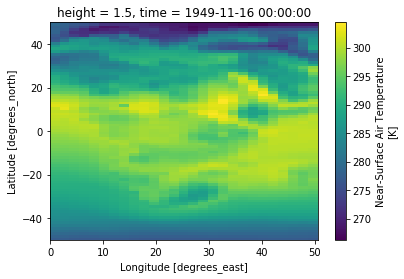

In [28]:
Image(da.plot())